91.7420412449963


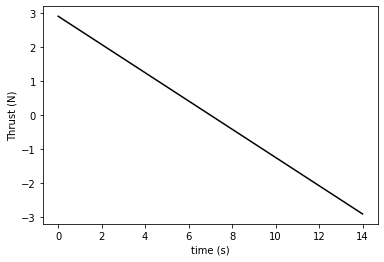

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T0 =  2.9
t0 =  7
M = 30000 + 300
L = 20.3
l = 15
k = (12*T0*l)/(M*L*L)

def Tau(t,T0):
    return T0*(1 - (t/t0))

T = []
t = np.linspace(0,2*t0,10*t0)
for i in range(len(t)):
    T.append(Tau(t[i],T0))

alpha = []
omega = [0]
theta = [-90]
for i in range(len(t)):
    alpha.append(k*(1 - (t[i]/t0)))


for i in range(1,len(t)-1):    
    omega.append(omega[i-1] + (alpha[i-1] + alpha[i+1])/(2*0.1))


for i in range(1,len(t)-2):       
    theta.append((theta[i-1]*3.14/180 + (omega[i-1] + omega[i+1])/(2*0.1))*180/3.14)

#plt.plot(alpha,'-r')
#plt.plot(t[0:10*t0 -1],omega,'-b')
#plt.plot(t[0:10*t0 -2],theta,'-g')
plt.plot(t[0:10*t0 ],T,'-k')
plt.ylabel('Thrust (N)')
plt.xlabel('time (s)')
print(theta[-1])

360.68297613318055


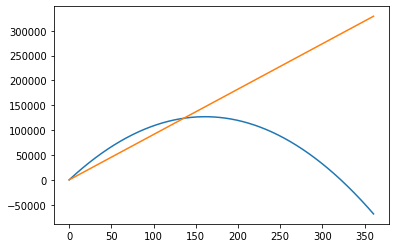

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
V = 1824.1
theta = 60*3.14/180
h0 = 68.5*1000
t0 = (V*np.sin(theta) + np.sqrt(V**2*(np.sin(theta))**2 + 2*9.81*h0))/(9.81)

R = V*np.cos(theta)*t0

t = np.linspace(0,t0,2000)
h = []
r = []
for i in range(len(t)):
    h.append(V*np.sin(theta)*t[i]  - 0.5*9.81*t[i]*t[i])
    r.append(V*np.cos(theta)*t[i])

print(t0)
plt.plot(t,h)
plt.plot(t,r)





Text(0.5, 0, 'Velocity (m/s)')

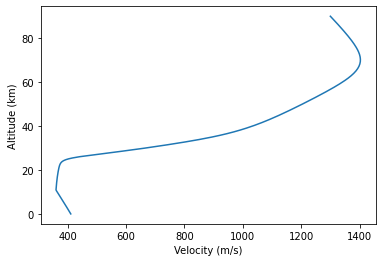

In [ ]:
from scipy.integrate import odeint
import numpy as np
from numpy import sin,cos,tan 
import matplotlib.pyplot as plt

m = 20000
omegaE  = 7.292e-5
muE = 3.98600e14
re = 6378e3
Sref = 113.1
'''
def Temp(r):
    h = (r - re)/1000;
    ans = 0;
    if h > 0 and h <= 10000:
        ans = 20 - 7.7*h + 273.15
    elif h > 10000 and h <= 20000:
        ans = -57 + 273.15
    elif h > 20000 and h <= 47000:
        ans = 2.11*h - 47 + 273.15
    elif h > 47000 and h <= 57000:
        ans = 273.15
    else:
        ans = -3.214*h - 173.6 + 273.15
    return ans
'''
def Temp(r):
    h = r - re;
    ans = 0;
    if h > 25000:
        ans = 141.94 + 0.0029*h
    elif h > 11000 and h <= 25000:
        ans = 216.69
    else:
        ans = 288.19 - 0.00649*h
    return ans

def Cd(M):
    a = 96.23182049;
    b = -84.08353075;
    c = 36.11469423;
    d = -7.64491471;
    e = 0.63873741;
    f = -42.48672719;
    return a*M +b*M**2 + c*M**3 + d*M**4 + e*M**5 + f

def rho(r):
    return 1.225*np.exp(-(r-re)/9296)


def D(r,v):
    M = v/(np.sqrt(1.44*287*Temp(r)))
    CD = Cd(M) 
    return CD*Sref*0.5*rho(r)*v**2 


def pend(y, t, m, omegaE, muE):
    r,zeta,phi,gamma,v,zai = y
    dydt = [v*sin(gamma),
            v*cos(gamma)*cos(zai)/(r*cos(phi)),
            v*cos(gamma)*cos(zai)/r,
            (v/r - muE/(r**2*v))*cos(gamma) + cos(phi)*(2*omegaE*cos(zai) + (omegaE**2*r/v)*(cos(phi)*cos(gamma)) + sin(phi)*sin(gamma)*sin(zai)),
            -muE*sin(gamma)/r**2 - D(r,v)/m + omegaE**2*r*cos(phi)*(cos(phi)*sin(gamma) - sin(phi)*cos(gamma)*sin(zai)) ,
            -(v/r)*tan(phi)*cos(gamma)*cos(zai) + 2*omegaE*cos(phi)*tan(gamma)*sin(zai) - omegaE**2*r*sin(phi)*cos(phi)*cos(zai)/(v*cos(gamma)) - 2*omegaE*cos(phi)
            ]
    return dydt

params = (1)
t = np.linspace(0,500,1000)
sol = odeint(pend,[90000+re,3.14/2,3.14/2,-3.14/4,1300,3.14/2 -3.14*5/6] , t, args=(m,omegaE,muE))

I = 0
for i in range(len(t)):
    if sol[i,0] < re :
        I = i
        break

plt.plot(sol[0:I,4],(sol[0:I,0]-re)/1000)
#plt.plot(t[0:I],(sol[0:I,0]- re)/1000)
#plt.plot(t[0:I],sol[0:I,4])
#plt.plot(t[0:I],sol[0:I,4])

plt.ylabel('Altitude (km)')
plt.xlabel('Velocity (m/s)')

